In [1]:
!pip install tensorflow_ranking tensorflow_probability tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.4/150.4 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 85.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 54.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 3.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 79.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 89.6 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing inst

In [1]:
from generating_synth_data import run as generate_synth_data

generate_synth_data(users=range(16), real_gestures_allowed_per_terminal=10, gestures_to_generate=1000, method="self_mixed") # adversarially_mixed

2023-02-02 23:46:15.933971: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-02 23:46:16.894015: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-02 23:46:16.894100: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-02 23:46:16.894110: W tensorfl

auth_user is 0
Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-02-02 11:33:12           64
config.json                                    2023-02-02 11:33:12         7065
variables.h5                                   2023-02-02 11:33:12       613656
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......conv1d
.........vars
............0
............1
......conv1d_1
.........vars
............0
............1
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......input_layer
.........vars
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......max_pooling1d
.........vars
......max_pooling2d
.........vars
......max_pooling2d

In [1]:
from testing_results import run
import pickle
#data/generated_samples/user={x}_all_users_model={model_handle}_method={method}.npy
#handle = lambda x: f"data/generated_samples/user={x}_all_users_model=filtered_specifically_trained_v2_30_method=self_mixed.npy"
#handle = lambda x: f"data/generated_samples/user={x}_method=adversarially_mixed_real_gestures=10.npy"

models = ["wae_stats_specific_final_50"]# , "wae_specific_v3_50", "wae_stats_specific_50"]
reps = 3
#limit_data_first_x=2,

users = range(16)


    
original = run(models=["WatchAuth"], median_filtering=False, score_mode="binary", repetitions=reps, save_name=f"test_results_reduced_features_macro") # limit_data_first_x =2
#original_restricted = run(models=["WatchAuth"], users = users, median_filtering=False, score_mode="binary", limit_data_first_x=2, repetitions=reps, save_name=f"test_results_reduced_features_wae_macro_gestures=2")
outputs = {"original": original}
for forbidden in range(9):
    outputs[forbidden] = run(models=["WatchAuth"], forbidden_stat = forbidden, median_filtering=False, score_mode="binary", repetitions=reps, save_name=f"test_results_reduced_features_macro_{forbidden}") # limit_data_first_x =2

#outputs = {"original_restricted":original_restricted}
"""
for model in models:
    for method in [ "just_sampled"]: #, "partially_sampled", "adversarially_mixed", "self_mixed", "same_user_other_gestures_terminal=345"]:   #["just_sampled", "adversarially_mixed", "self_mixed", "same_user_other_gestures_terminal=345"]: # 

        handle = lambda x: f"data/generated_samples/user={x}_model={model}_method={method}.npy"

        #limit_data_first_x=2,
        #output = run(models=["WatchAuth"], median_filtering=False, score_mode="binary", extra_data_handle = handle, repetitions=reps, save_name=f"{model}-{method}-macro")
        #limit_data_first_x =2,
        #outputs[f"{model}-{method}-macro"] = output
        
        output = run(models=["WatchAuth"], users = users,limit_data_first_x =2, median_filtering=False, score_mode="binary", extra_data_handle = handle, repetitions=reps, save_name=f"{model}-{method}-macro-2-gestures")
        #
        outputs[f"{model}-{method}-macro-2-gestures"] = output

        # limit_data_first_x=2, 
    
"""
"""
with open(r"data/stats/test_results_first_2_binary.pickle", "rb") as input_file:
    original = pickle.load(input_file)

outputs = {"original-binary":original}
    

for method in ["same_user_other_gestures_terminal=345", "adversarially_mixed", "self_mixed", "just_sampled"]: 

    string = f"data/stats/{model}-{method}-binary.pickle"
    with open(string, "rb") as input_file:
        outputs[f"{model}-{method}-binary"] = pickle.load(input_file)

"""
        

#for h in handles:
    
#output = run(models=["WatchAuth", "SVM", "MLP", "DL"], limit_data_first_x = 10, repetitions=5, save_name="test_results_no_extra_data_real_gestures=5")
#output2 = run(models=["WatchAuth", "SVM", "MLP", "DL"], limit_data_first_x = 10, extra_data_handle = handle, repetitions=5, save_name="test_results_extra_data_self_mixed_real_gestures=5")
#limit_data_first_x = 5,




2023-02-14 10:35:20.924969: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-14 10:35:21.972351: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-14 10:35:21.972441: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-14 10:35:21.972451: W tensorfl

(34255, 72)
(34255, 8)
auth_user is 0
auth_user is 1
auth_user is 2
auth_user is 3
auth_user is 4
auth_user is 5
auth_user is 6
auth_user is 7
auth_user is 8
auth_user is 9
auth_user is 10
auth_user is 11
auth_user is 12
auth_user is 13
auth_user is 14
auth_user is 15
(34255, 72)
(34255, 8)
auth_user is 0
auth_user is 1
auth_user is 2
auth_user is 3
auth_user is 4
auth_user is 5
auth_user is 6
auth_user is 7
auth_user is 8
auth_user is 9
auth_user is 10
auth_user is 11
auth_user is 12
auth_user is 13
auth_user is 14
auth_user is 15
(34255, 72)
(34255, 8)
auth_user is 0
auth_user is 1
auth_user is 2
auth_user is 3
auth_user is 4
auth_user is 5
auth_user is 6
auth_user is 7
auth_user is 8


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


auth_user is 9
auth_user is 10


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


auth_user is 11
auth_user is 12
auth_user is 13
auth_user is 14
auth_user is 15
(34255, 72)
(34255, 8)
auth_user is 0
auth_user is 1
auth_user is 2
auth_user is 3
auth_user is 4
auth_user is 5
auth_user is 6
auth_user is 7
auth_user is 8
auth_user is 9
auth_user is 10


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


auth_user is 11
auth_user is 12
auth_user is 13
auth_user is 14
auth_user is 15
(34255, 72)
(34255, 8)
auth_user is 0
auth_user is 1
auth_user is 2
auth_user is 3
auth_user is 4
auth_user is 5
auth_user is 6
auth_user is 7
auth_user is 8
auth_user is 9
auth_user is 10
auth_user is 11
auth_user is 12
auth_user is 13
auth_user is 14
auth_user is 15
(34255, 72)
(34255, 8)
auth_user is 0
auth_user is 1
auth_user is 2
auth_user is 3
auth_user is 4
auth_user is 5
auth_user is 6
auth_user is 7
auth_user is 8


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


auth_user is 9
auth_user is 10
auth_user is 11
auth_user is 12
auth_user is 13
auth_user is 14
auth_user is 15
(34255, 72)
(34255, 8)
auth_user is 0
auth_user is 1
auth_user is 2
auth_user is 3
auth_user is 4
auth_user is 5
auth_user is 6
auth_user is 7
auth_user is 8
auth_user is 9
auth_user is 10


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


auth_user is 11
auth_user is 12
auth_user is 13
auth_user is 14
auth_user is 15
(34255, 72)
(34255, 8)
auth_user is 0
auth_user is 1
auth_user is 2
auth_user is 3


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


auth_user is 4
auth_user is 5
auth_user is 6
auth_user is 7
auth_user is 8


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


auth_user is 9
auth_user is 10


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


auth_user is 11
auth_user is 12
auth_user is 13
auth_user is 14
auth_user is 15
(34255, 72)
(34255, 8)
auth_user is 0
auth_user is 1
auth_user is 2
auth_user is 3
auth_user is 4
auth_user is 5
auth_user is 6
auth_user is 7
auth_user is 8


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


auth_user is 9
auth_user is 10
auth_user is 11
auth_user is 12
auth_user is 13
auth_user is 14
auth_user is 15
(34255, 72)
(34255, 8)
auth_user is 0
auth_user is 1
auth_user is 2
auth_user is 3
auth_user is 4
auth_user is 5
auth_user is 6
auth_user is 7
auth_user is 8
auth_user is 9
auth_user is 10
auth_user is 11
auth_user is 12
auth_user is 13
auth_user is 14
auth_user is 15


'\nwith open(r"data/stats/test_results_first_2_binary.pickle", "rb") as input_file:\n    original = pickle.load(input_file)\n\noutputs = {"original-binary":original}\n    \n\nfor method in ["same_user_other_gestures_terminal=345", "adversarially_mixed", "self_mixed", "just_sampled"]: \n\n    string = f"data/stats/{model}-{method}-binary.pickle"\n    with open(string, "rb") as input_file:\n        outputs[f"{model}-{method}-binary"] = pickle.load(input_file)\n\n'

In [2]:
def summarise_by_model(output, models=["WatchAuth"]):
    
    for stat in ["fm", "prec", "rec", "eer", "far", "auroc", "loss"]:
        for model_name in models:
            l = []
            for auth_user in range(16):
                l.append(output[f"{auth_user}_{model_name}"][stat][0])
            print(model_name, stat, sum(l) /16)
        print("")

model_type = "WatchAuth"
summarise_by_model(original, [model_type])
#summarise_by_model(original_restricted, [model_type])

for key in outputs:
    print("original")

    summarise_by_model(original, [model_type])
    #else:
    #    summarise_by_model(original, [model_type])
    print(key)
    summarise_by_model(outputs[key],[model_type]) #s[key]
    
    print("_"*50)


WatchAuth fm 0.25296087684845925

WatchAuth prec 0.5725081085600127

WatchAuth rec 0.17684922443996293

WatchAuth eer 0.158750558413174

WatchAuth far 0.44584382714244014

WatchAuth auroc 0.8884506525017353

WatchAuth loss 0.20841221047250114

original
WatchAuth fm 0.25296087684845925

WatchAuth prec 0.5725081085600127

WatchAuth rec 0.17684922443996293

WatchAuth eer 0.158750558413174

WatchAuth far 0.44584382714244014

WatchAuth auroc 0.8884506525017353

WatchAuth loss 0.20841221047250114

original
WatchAuth fm 0.25296087684845925

WatchAuth prec 0.5725081085600127

WatchAuth rec 0.17684922443996293

WatchAuth eer 0.158750558413174

WatchAuth far 0.44584382714244014

WatchAuth auroc 0.8884506525017353

WatchAuth loss 0.20841221047250114

__________________________________________________
original
WatchAuth fm 0.25296087684845925

WatchAuth prec 0.5725081085600127

WatchAuth rec 0.17684922443996293

WatchAuth eer 0.158750558413174

WatchAuth far 0.44584382714244014

WatchAuth auroc 0.

In [53]:
output


{'1_WatchAuth': {'fm': (0.0, 0.0),
  'prec': (0.0, 0.0),
  'rec': (0.0, 0.0),
  'eer': (0.38308943089430897, 0.04086318296936095),
  'far': (0.7772357723577237, 0.05182989000105359),
  'auroc': (0.614260162601626, 0.029885767489228988),
  'loss': (0.2314221011958338, 0.011810267731724739)},
 '2_WatchAuth': {'fm': (0.028038601982263957, 0.0002258803870068991),
  'prec': (0.4444444444444444, 0.09622504486493764),
  'rec': (0.014492753623188406, 0.0),
  'eer': (0.4176509186351706, 0.028259060738384318),
  'far': (0.9206036745406824, 0.0030069394323857163),
  'auroc': (0.5497736695956484, 0.02730802272908507),
  'loss': (0.38803041683510825, 0.03706212639952898)},
 '3_WatchAuth': {'fm': (0.0, 0.0),
  'prec': (0.0, 0.0),
  'rec': (0.0, 0.0),
  'eer': (0.30714516650501134, 0.034827631450359484),
  'far': (0.7057872615583576, 0.05908099472146985),
  'auroc': (0.7122115649435404, 0.025779469324417863),
  'loss': (0.2136626571397593, 0.016614129599429744)}}

In [5]:
from WAE_stats import WAE_stats
vae = WAE_stats(50)
vae.load_model("no_1", model)



Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-02-14 02:49:22           64
config.json                                    2023-02-14 02:49:22        16044
variables.h5                                   2023-02-14 02:49:22      1383776
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......concatenate
.........vars
......conv1d
.........vars
............0
............1
......conv1d_1
.........vars
............0
............1
......conv1d_10
.........vars
............0
............1
......conv1d_11
.........vars
............0
............1
......conv1d_2
.........vars
............0
............1
......conv1d_3
.........vars
............0
............1
......conv1d_4
.........vars
............0
............1
......conv1d_5
.........vars
............0
............1
......conv1d_6
.........vars
............0
............1
......conv1d_7
.........vars
.

In [6]:
import numpy as np
file_name = "raw_with_maps" # or offsets_2

x_data = np.load(f"data/processed/x_{file_name}_filtered.npy")[:,:,[0,1,2,4,5,6]] # pre-filtered data is "windowed_filtered"
feature_x_data = np.load(f"data/processed/x_{file_name}_features.npy")
y_user = np.load(f"data/processed/y_user_{file_name}.npy")
y_intent = np.load(f"data/processed/y_intent_{file_name}.npy")
y_gesture = np.load(f"data/processed/y_gesture_type_{file_name}.npy")

train_gesture_map = np.load(f"data/processed/train_gesture_map_{file_name}.npy")
test_gesture_map = np.load(f"data/processed/test_gesture_map_{file_name}.npy")

extra_data = np.load("data/generated_samples/user=1_model=wae_stats_specific_final_50_method=just_sampled.npy")


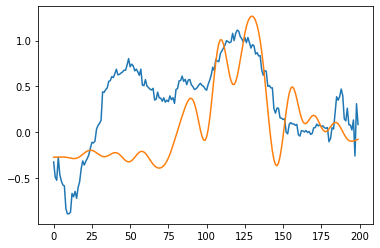

In [7]:
from matplotlib import pyplot as plt

specific_user_training_data = x_data[(y_user.argmax(axis=1) == 1) & (train_gesture_map == 1)]

plt.plot(extra_data[25,:,0], label="generated")
plt.plot(specific_user_training_data[0,:,0])

In [5]:
transformed = vae.scaler.transform(x_data[test_gesture_map == 1])
vae.auth(vae.encoder(transformed[:128])[2])

2023-02-12 14:07:24.259131: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:433] Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR
2023-02-12 14:07:24.259284: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at conv_ops.cc:1152 : UNIMPLEMENTED: DNN library is not found.


UnimplementedError: Exception encountered when calling layer 'conv1d_30' (type Conv1D).

{{function_node __wrapped__Conv2D_device_/job:localhost/replica:0/task:0/device:GPU:0}} DNN library is not found. [Op:Conv2D]

Call arguments received by layer 'conv1d_30' (type Conv1D):
  • inputs=tf.Tensor(shape=(128, 200, 1), dtype=float32)

In [3]:
import pickle
with open(r"data/stats/test_results_no_extra_data_all_real_gestures.pickle", "rb") as input_file:
    output = pickle.load(input_file)

with open(r"data/stats/test_results_extra_data_adversarially_mixed_5_real_gestures_vae_all_users_10_high_beta.pickle", "rb") as input_file:
    output2 = pickle.load(input_file)

In [4]:
import numpy as np
np.nonzero([False, False, False])[5:]

()

In [13]:
from testing_results import summarise_by_model
summarise_by_model(output, ["WatchAuth", "SVM", "MLP"])


WatchAuth fm 0.7185747452249527
SVM fm 0.7714870375978254
MLP fm 0.8037434356609633

WatchAuth prec 0.9161279006587859
SVM prec 0.8509159502441517
MLP prec 0.8557543266212473

WatchAuth rec 0.6956938068759988
SVM rec 0.7353627446914727
MLP rec 0.782128233427685

WatchAuth eer 0.10690882943765923
SVM eer 0.09699200408173281
MLP eer 0.08758771832492292

WatchAuth far 0.2855231954302374
SVM far 0.2628185164643822
MLP far 0.2991714993353043



In [14]:
summarise_by_model(output2, ["WatchAuth", "SVM", "MLP"])

WatchAuth fm 0.7305147488981539
SVM fm 0.7740212761406619
MLP fm 0.7577978633183701

WatchAuth prec 0.9413559696437278
SVM prec 0.8540485773240684
MLP prec 0.8290380445075737

WatchAuth rec 0.7156577506823933
SVM rec 0.7393354938491904
MLP rec 0.726462895322582

WatchAuth eer 0.10593415832210717
SVM eer 0.10367395007816747
MLP eer 0.10918614959331466

WatchAuth far 0.30637191516775675
SVM far 0.29658211806275414
MLP far 0.32343305913571085



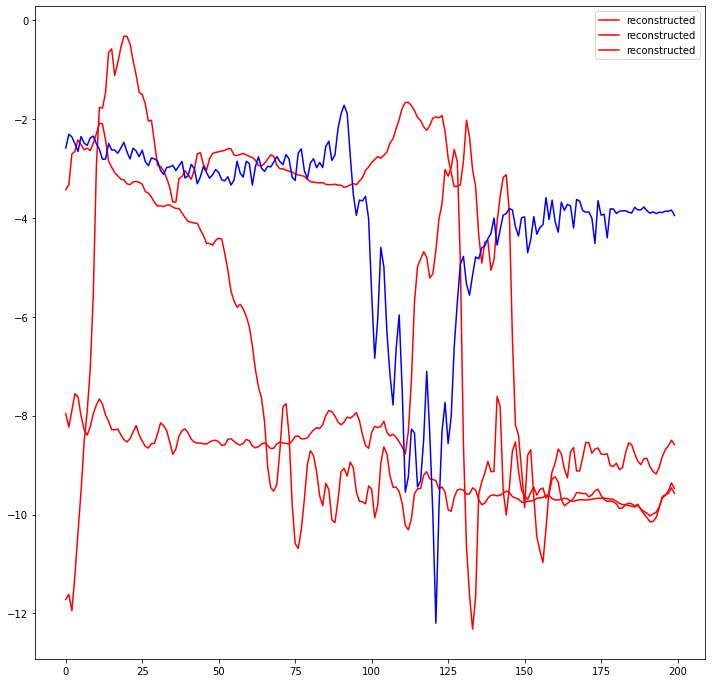

In [11]:
import numpy as np
from matplotlib import pyplot as plt
gen_data = np.load(handle(0))

fig,ax = plt.subplots(figsize=(12,12))

channel = 1

for i in range(3):
    ax.plot(gen_data[i,:,channel], label=f"reconstructed", c = "red")
ax.legend()

file_name = "raw_with_maps" # or offsets_2

x_data = np.load(f"data/processed/x_{file_name}.npy") # _filtered
y_user = np.load(f"data/processed/y_user_{file_name}.npy")
y_intent = np.load(f"data/processed/y_intent_{file_name}.npy").astype(int)
y_gesture = np.load(f"data/processed/y_gesture_type_{file_name}.npy")

train_gesture_map = np.load(f"data/processed/train_gesture_map_{file_name}.npy").astype(int)
test_gesture_map = np.load(f"data/processed/test_gesture_map_{file_name}.npy").astype(int)


real_data = x_data[(train_gesture_map == 1) & (y_user.argmax(axis=1) == 0) & (y_gesture.argmax(axis=1) == 3)]

for i in range(1):
    ax.plot(real_data[i,:,channel], label=f"real", c = "blue")


In [17]:


for auth_user in range(16):
    display(output[f"{auth_user}_MLP"])
    display(output2[f"{auth_user}_MLP"])
    print()

{'fm': (0.857073154249198, 0.01702568804882569),
 'prec': (0.8511545566538246, 0.012468668539470113),
 'rec': (0.8642308398628795, 0.028417666846368476),
 'eer': (0.04975514201762976, 0.012103020710348146),
 'far': (0.07737512242899118, 0.03279269156274873)}

{'fm': (0.8719377693444713, 0.008191645564532012),
 'prec': (0.8533292884312205, 0.00865297580963546),
 'rec': (0.893232737512243, 0.011762238046109853),
 'eer': (0.04779627815866798, 0.0050609248512297105),
 'far': (0.06797257590597452, 0.025705190522741225)}

{'fm': (0.755513955322444, 0.04258826369508578),
 'prec': (0.8085743208511931, 0.04317278996519261),
 'rec': (0.7211138211382113, 0.044266739802696124),
 'eer': (0.09970731707317074, 0.028287636219366887),
 'far': (0.2314146341463415, 0.11132301559564733)}

{'fm': (0.7962192847273899, 0.014829303924934013),
 'prec': (0.8282235370549029, 0.018448945022564035),
 'rec': (0.7707235772357725, 0.013319612958520861),
 'eer': (0.0753170731707317, 0.02880445467564369),
 'far': (0.20429268292682928, 0.1461569568582781)}

{'fm': (0.6114279478761461, 0.02344766912011063),
 'prec': (0.6291572275119035, 0.026461667546258567),
 'rec': (0.5995763437179049, 0.021934461193406137),
 'eer': (0.14881889763779527, 0.0872560326122524),
 'far': (0.38858267716535433, 0.3082472263179428)}

{'fm': (0.5999456849513829, 0.022456557281600942),
 'prec': (0.607126048329636, 0.021890237226490687),
 'rec': (0.5942884856784205, 0.023063725567779424),
 'eer': (0.1655511811023622, 0.08804077465785956),
 'far': (0.4005905511811023, 0.30228876138055566)}

{'fm': (0.779180340019473, 0.11242591282068426),
 'prec': (0.8173677430389243, 0.07897464965479614),
 'rec': (0.7572403635449222, 0.13894068905190232),
 'eer': (0.09505334626576141, 0.06134389253478912),
 'far': (0.35208535402521823, 0.30621295734832976)}

{'fm': (0.7153059282267418, 0.010437437628520632),
 'prec': (0.7720272085792633, 0.028279376117856938),
 'rec': (0.6814204116822932, 0.01402712959396419),
 'eer': (0.10514064015518913, 0.06182737083152889),
 'far': (0.32803103782735205, 0.27484391538646535)}

{'fm': (0.8199014242298611, 0.014488040197262292),
 'prec': (0.8416227126764539, 0.015813442152854067),
 'rec': (0.8015790402258292, 0.014677329257762101),
 'eer': (0.07686034658511723, 0.01994421545589496),
 'far': (0.14250764525993884, 0.0872420603531699)}

{'fm': (0.8353822140138234, 0.015949502294587904),
 'prec': (0.8610757543425169, 0.02921963934309756),
 'rec': (0.8147484905512428, 0.011593833631823652),
 'eer': (0.07461773700305811, 0.030148142258149286),
 'far': (0.14434250764525994, 0.0937419584505466)}

{'fm': (0.8138577403935827, 0.09234909846674601),
 'prec': (0.8532584351851702, 0.05479519485362657),
 'rec': (0.7913300492610837, 0.12347192618997561),
 'eer': (0.06285714285714288, 0.046155295901509276),
 'far': (0.11408866995073894, 0.09507363638649728)}

{'fm': (0.822794020181262, 0.03663283430680809),
 'prec': (0.8665394630746424, 0.02414601064103024),
 'rec': (0.7920689655172413, 0.04686843291214225),
 'eer': (0.06817733990147783, 0.02417710704437794),
 'far': (0.129064039408867, 0.0926082171309426)}

{'fm': (0.8480753363549549, 0.023423805420942977),
 'prec': (0.8395327642124621, 0.032573900651980424),
 'rec': (0.8595672972385302, 0.025900005641771168),
 'eer': (0.07162426614481407, 0.013207581233970239),
 'far': (0.1095890410958904, 0.04530660235925726)}

{'fm': (0.8374586057386819, 0.02390593863820462),
 'prec': (0.8435827579476346, 0.01449448981119831),
 'rec': (0.8325614263970429, 0.03435386249805248),
 'eer': (0.09491193737769081, 0.021736653514210395),
 'far': (0.16927592954990217, 0.08874491071133642)}

{'fm': (0.8901790673338723, 0.007421363243537103),
 'prec': (0.9184892019148758, 0.014199518341626837),
 'rec': (0.8669950738916257, 0.01899588126567374),
 'eer': (0.0606896551724138, 0.013697770476011473),
 'far': (0.13871921182266012, 0.09337646003984444)}

{'fm': (0.8938888761657834, 0.02547778509542038),
 'prec': (0.9263068274487389, 0.024066635583706905),
 'rec': (0.8675862068965519, 0.03261319995014123),
 'eer': (0.05635467980295568, 0.020892740087566752),
 'far': (0.13399014778325125, 0.09550045963391238)}

{'fm': (0.763994320955215, 0.033103400163481886),
 'prec': (0.8279543525159309, 0.05712969069390035),
 'rec': (0.7230193934392408, 0.023305647773169715),
 'eer': (0.07538167938931299, 0.029587846820064233),
 'far': (0.2471374045801527, 0.20824712199481835)}

{'fm': (0.7362359036212048, 0.03450125631270493),
 'prec': (0.7773623106308479, 0.05496824964839547),
 'rec': (0.7076929028264906, 0.023644445586166043),
 'eer': (0.11087786259541987, 0.0702888788107379),
 'far': (0.5488549618320612, 0.47370039336185166)}

{'fm': (0.8379921202648524, 0.13514642492936174),
 'prec': (0.8218575110364468, 0.1341077045181319),
 'rec': (0.8566666666666667, 0.13578193802519375),
 'eer': (0.04933333333333332, 0.047190452164714465),
 'far': (0.10476190476190475, 0.09846209717702985)}

{'fm': (0.7403421314157004, 0.012613137102607839),
 'prec': (0.71562523064788, 0.013652739722287303),
 'rec': (0.7738095238095237, 0.021720237279620004),
 'eer': (0.06647619047619047, 0.02300941343398313),
 'far': (0.1121904761904762, 0.07400251267413942)}

{'fm': (0.756908116796301, 0.1926448809751032),
 'prec': (0.7845537962085902, 0.1410676506134227),
 'rec': (0.7555700156168662, 0.2236343682434036),
 'eer': (0.1231071779744346, 0.11162202736635003),
 'far': (0.30914454277286135, 0.2857287431755025)}

{'fm': (0.6078718784982311, 0.02094837807197481),
 'prec': (0.6500748634065519, 0.02338496290353114),
 'rec': (0.587708947885939, 0.01865197025123775),
 'eer': (0.14611602753195674, 0.08268244748418259),
 'far': (0.37895771878072765, 0.30240472603154284)}

{'fm': (0.9019810198376023, 0.03383222190000549),
 'prec': (0.8962424304194464, 0.017875574294133015),
 'rec': (0.9084941176470588, 0.05274535434371722),
 'eer': (0.05899999999999998, 0.0323496522392436),
 'far': (0.2916, 0.27967266580772604)}

{'fm': (0.9006669920647123, 0.036913290465179424),
 'prec': (0.9033056669626072, 0.03212192448444305),
 'rec': (0.8984823529411765, 0.04292667261101524),
 'eer': (0.059999999999999984, 0.026201145013147773),
 'far': (0.1248, 0.08852513767286666)}

{'fm': (0.8817871775813169, 0.05249805433516871),
 'prec': (0.907408142351632, 0.030756740140934085),
 'rec': (0.8643429530564731, 0.08165163686550954),
 'eer': (0.0660079051383399, 0.04517118240622971),
 'far': (0.1974308300395257, 0.16394290186126748)}

{'fm': (0.8738952239837314, 0.018264951485349203),
 'prec': (0.934631525112987, 0.014595138571512645),
 'rec': (0.8300110996805458, 0.02022579862539973),
 'eer': (0.08438735177865613, 0.0590930571872833),
 'far': (0.22569169960474306, 0.20995477641501842)}

{'fm': (0.9689581549133196, 0.008088291709262611),
 'prec': (0.9570720498025181, 0.02120847789393204),
 'rec': (0.9818217821782177, 0.010979102319048648),
 'eer': (0.006138613861386144, 0.004768948348036557),
 'far': (0.01663366336633665, 0.014026596775981313)}

{'fm': (0.9643988249393856, 0.006931623770213951),
 'prec': (0.9622688279334113, 0.01053125848087386),
 'rec': (0.9666600660066006, 0.006128775962893585),
 'eer': (0.012475247524752486, 0.004880696056976732),
 'far': (0.02415841584158418, 0.016913024188977558)}

{'fm': (0.8422229493578979, 0.06802534150878092),
 'prec': (0.9059055948245259, 0.02095684760099042),
 'rec': (0.8079664179104478, 0.1082687429543304),
 'eer': (0.04457711442786068, 0.025323334212974162),
 'far': (0.28875621890547265, 0.3977321169587311)}

{'fm': (0.7993290527391, 0.0388212534929863),
 'prec': (0.8894715497305391, 0.034700661526513965),
 'rec': (0.7480223880597014, 0.03929726195931245),
 'eer': (0.05671641791044777, 0.030893879992557258),
 'far': (0.18009950248756218, 0.144867557590875)}

{'fm': (0.7204412757889227, 0.13544677626736087),
 'prec': (0.7452753647878443, 0.16091532004915926),
 'rec': (0.7030975479336948, 0.1149362121221987),
 'eer': (0.07924528301886793, 0.045471436783862014),
 'far': (0.17298907646474676, 0.09753487142797349)}

{'fm': (0.7547457811322656, 0.017073865632519607),
 'prec': (0.7991802606759084, 0.03103000506506765),
 'rec': (0.7252718152420237, 0.020091508575582482),
 'eer': (0.08857994041708044, 0.0363881539886322),
 'far': (0.16365441906653427, 0.10390392977162938)}

In [11]:
output

{'0_WatchAuth': {'fm': (0.7039298267669003, 0.011233621102149666),
  'prec': (0.8974728651914958, 0.012933276003458694),
  'rec': (0.6435495225269343, 0.008997111316008622),
  'eer': (0.054260528893241934, 0.005435626611365979),
  'far': (0.13653281096963762, 0.03273852865330036)},
 '0_SVM': {'fm': (0.8360641976966725, 1.2412670766236366e-16),
  'prec': (0.8729987340829549, 1.2412670766236366e-16),
  'rec': (0.8066234084231144, 1.2412670766236366e-16),
  'eer': (0.05288932419196868, 0.0),
  'far': (0.14201762977473065, 0.0)},
 '0_MLP': {'fm': (0.8318490390642218, 0.08343664801118261),
  'prec': (0.8747176240915893, 0.039048268244496),
  'rec': (0.8078966699314398, 0.11633122542354048),
  'eer': (0.05621939275220374, 0.03813878253527705),
  'far': (0.10068560235063664, 0.07830985502675894)},
 '0_DL': {'fm': (0.7191764705882353, nan),
  'prec': (0.6816495461290882, nan),
  'rec': (0.7884809622918707, nan),
  'eer': (0.09304603330068562, nan),
  'far': (0.16748285994123413, nan)},
 '1_Wat

In [1]:
from visualise import *
import tensorflow as tf
from VAE import VAE


device_name = tf.test.gpu_device_name()

file_name = "raw_with_maps" # or offsets_2

x_data = np.load(f"data/processed/x_{file_name}.npy")
y_user = np.load(f"data/processed/y_user_{file_name}.npy")
y_intent = np.load(f"data/processed/y_intent_{file_name}.npy").astype(int)
y_gesture = np.load(f"data/processed/y_gesture_type_{file_name}.npy")

train_gesture_map = np.load(f"data/processed/train_gesture_map_{file_name}.npy").astype(int)
test_gesture_map = np.load(f"data/processed/test_gesture_map_{file_name}.npy").astype(int)

_map = (test_gesture_map == 1) & ((y_user.argmax(axis=1) >= 11))

intent_x = x_data[y_user.argmax(axis=1)==0]
intent_y = y_intent[y_user.argmax(axis=1)==0]

gesture_x = x_data[(train_gesture_map == 1) & ((y_gesture.argmax(axis=1) == 3) | (y_gesture.argmax(axis=1) == 4) | (y_gesture.argmax(axis=1) == 5))]
gesture_y = y_gesture.argmax(axis=1)[(train_gesture_map == 1) & ((y_gesture.argmax(axis=1) == 3) | (y_gesture.argmax(axis=1) == 4) | (y_gesture.argmax(axis=1) == 5))]


user_x = x_data[_map]
user_y = y_user.argmax(axis=1)[_map]

vae = VAE(None,None, None, None)
vae.load_model("all_users", "specifically_trained_20")

user_x = vae.scaler.transform(user_x)

def show_visuals(vae):
    
    latent_space_means, latent_space_stds, latent_space = vae.encoder(vae.scaler.transform(x_data[[0,100,200,300,400]]))
    print(latent_space_means[:,0].shape)
    plt.scatter(latent_space_means[:,0], latent_space_means[:,1], c=range(5), label="means")
    plt.scatter(latent_space[:,0], latent_space[:,1], label="sampled",c=range(5), s=10)
    
    print(latent_space_stds)

    plt.legend()
    

    plot_label_clusters(vae, vae.scaler.transform(user_x), user_y)
    visualise(vae, vae.scaler.transform(user_x), user_y, 10)
    plot_reconstructed_curves(vae, vae.scaler.transform(user_x), channel=7)
    
show_visuals(vae)




2023-02-05 23:00:21.698775: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-05 23:00:23.067751: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-05 23:00:23.067897: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-05 23:00:23.067915: W tensorfl

Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-02-05 12:41:32           64
config.json                                    2023-02-05 12:41:32         7128
variables.h5                                   2023-02-05 12:41:32       318104
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......conv1d
.........vars
............0
............1
......conv1d_1
.........vars
............0
............1
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......input_layer
.........vars
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......max_pooling1d
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........var

2023-02-05 23:37:32.710738: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 16.61MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-02-05 23:37:32.710836: W tensorflow/core/kernels/gpu_utils.cc:50] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.
2023-02-05 23:37:32.710973: W tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:401] There was an error before creating cudnn handle: cudaErrorMemoryAllocation : out of memory
2023-02-05 23:37:33.434092: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 16.02MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may

NotFoundError: Exception encountered when calling layer 'conv2d_6' (type Conv2D).

{{function_node __wrapped__Conv2D_device_/job:localhost/replica:0/task:0/device:GPU:0}} No algorithm worked!  Error messages:
  Profiling failure on CUDNN engine 1: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16797696 bytes.
  Profiling failure on CUDNN engine 0: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
  Profiling failure on CUDNN engine 2: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16969216 bytes.
  Profiling failure on CUDNN engine 4: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 43196536 bytes.
  Profiling failure on CUDNN engine 5: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 17695696 bytes. [Op:Conv2D]

Call arguments received by layer 'conv2d_6' (type Conv2D):
  • inputs=tf.Tensor(shape=(5, 200, 16, 1), dtype=float32)

13/13 [==============================] - 0s 3ms/step


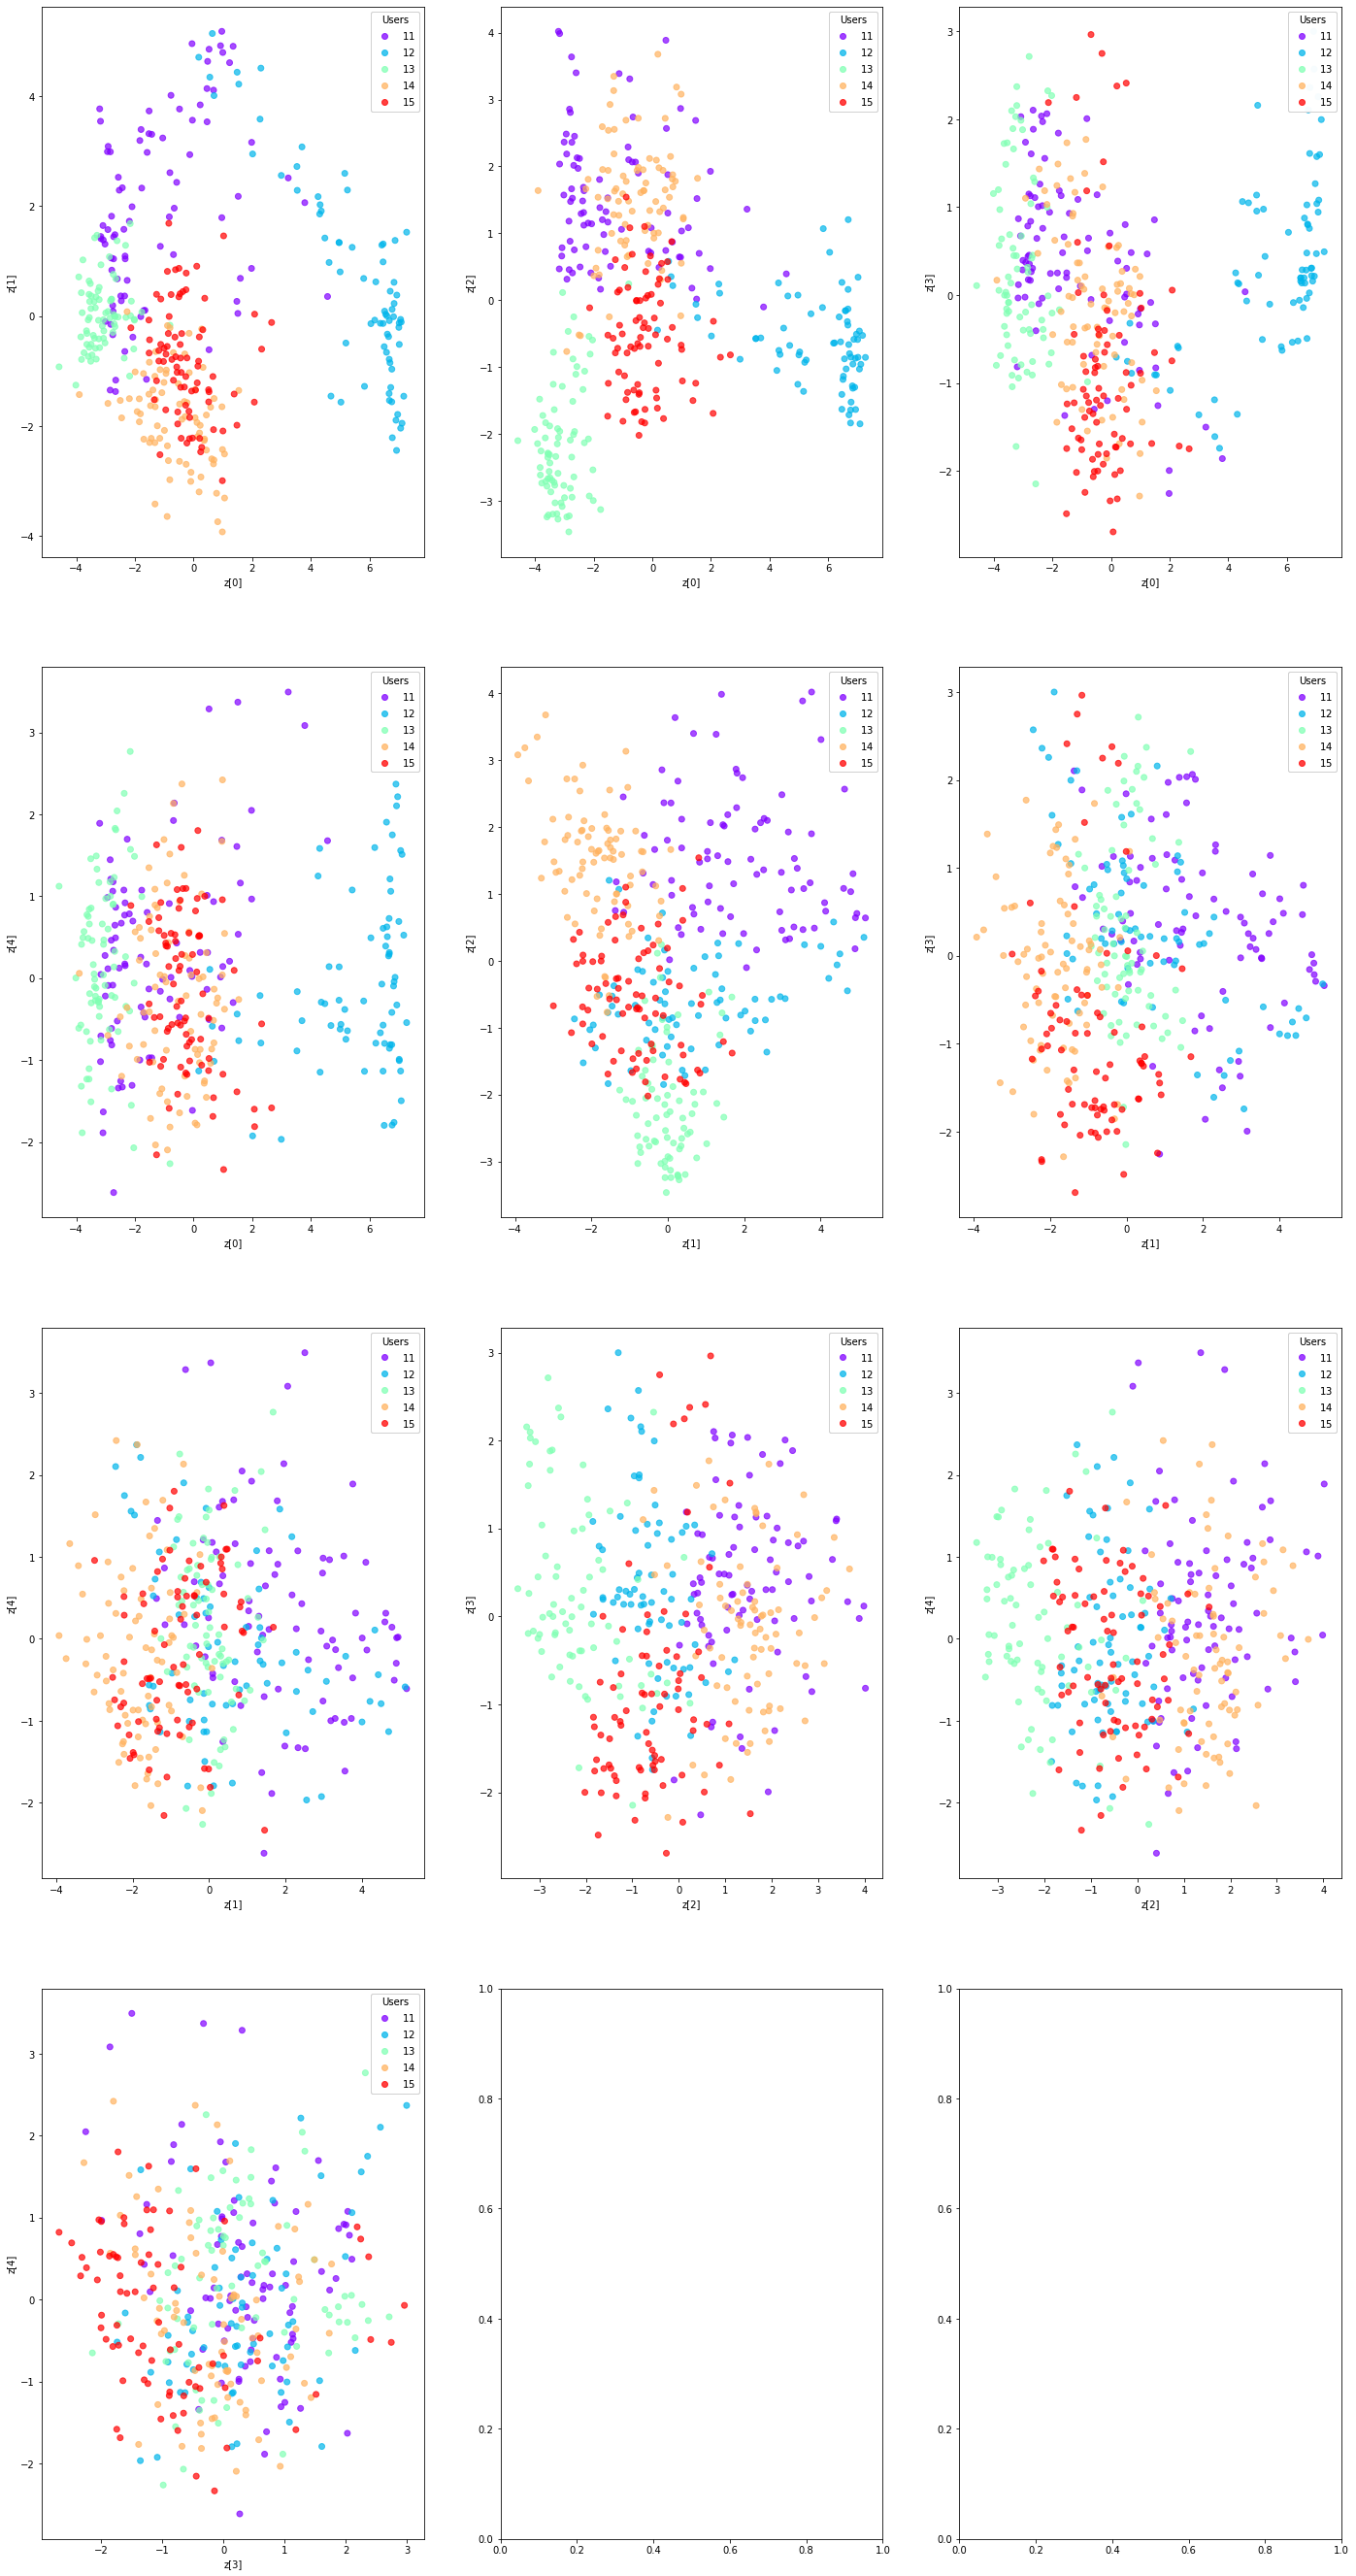

13/13 [==============================] - 0s 3ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


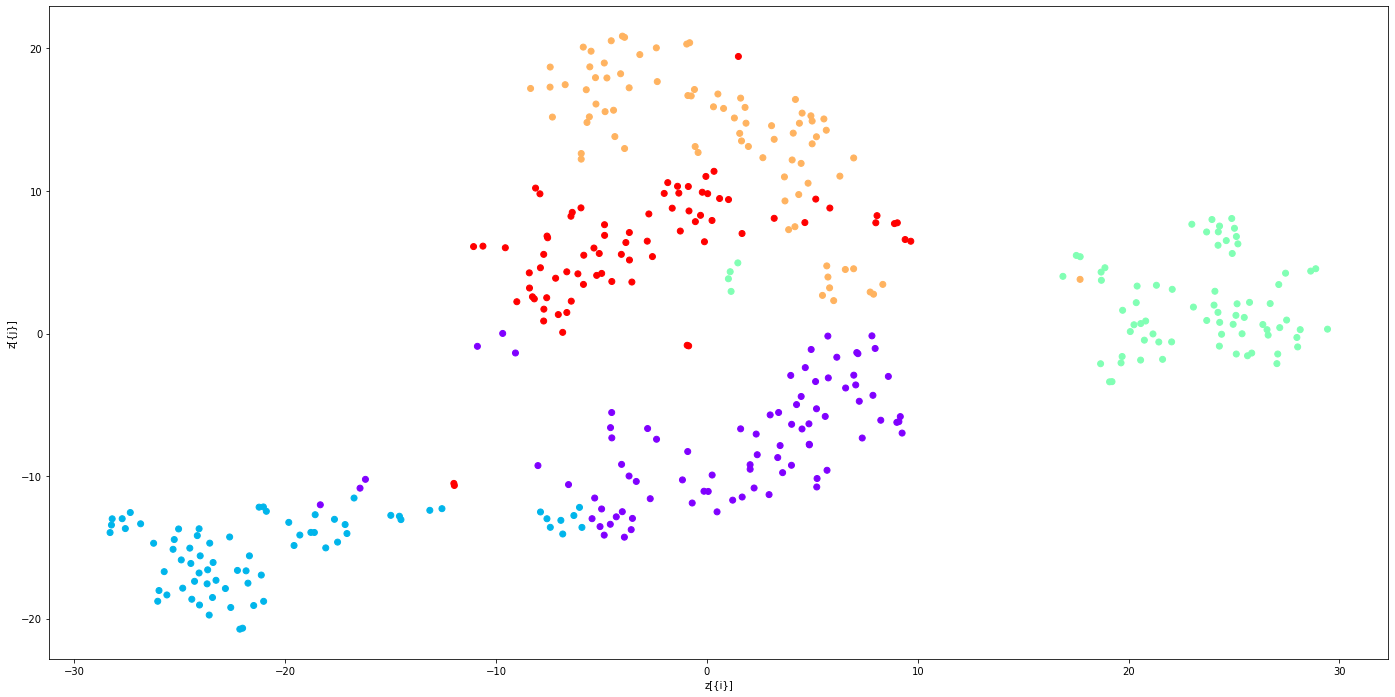

In [12]:

#plot_label_clusters(vae, intent_x, intent_y)
#visualise(vae, intent_x, intent_y)

plot_label_clusters(vae, user_x, user_y)
visualise(vae, user_x, user_y, 10)

#plot_label_clusters(vae, gesture_x, gesture_y)
#visualise(vae, gesture_x, gesture_y)

1/1 [==============================] - 0s 25ms/step


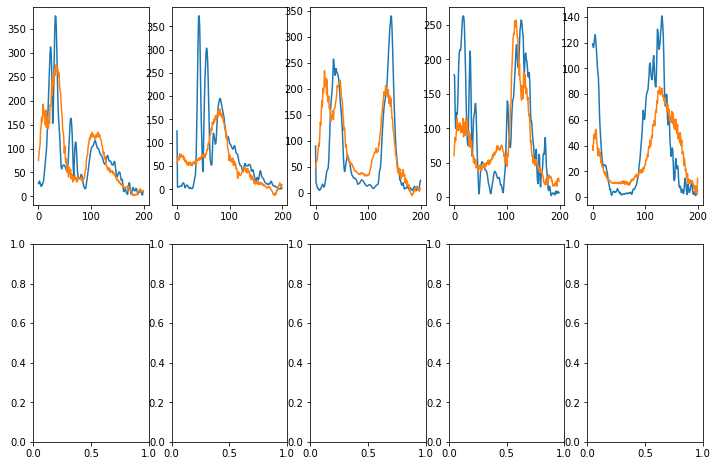

In [20]:

plot_reconstructed_curves(vae, user_x, channel=7)

In [14]:
from keras.optimizers import Adam
vae.compile(Adam(0.00000000001))

vae.fit(user_x, y_user[_map])

13/13 [==============================] - 7s 71ms/step - loss: -0.1464 - reconstruction_loss: 0.3702 - classification_loss: 0.0000e+00 - feature_loss: 0.0000e+00 - auth_loss: -0.6112 - kl_loss: 86.1509


Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-02-05 11:24:06           64
config.json                                    2023-02-05 11:24:06         7065
variables.h5                                   2023-02-05 11:24:06      6703944
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......conv1d
.........vars
............0
............1
......conv1d_1
.........vars
............0
............1
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......input_layer
.........vars
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......max_pooling1d
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........var

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


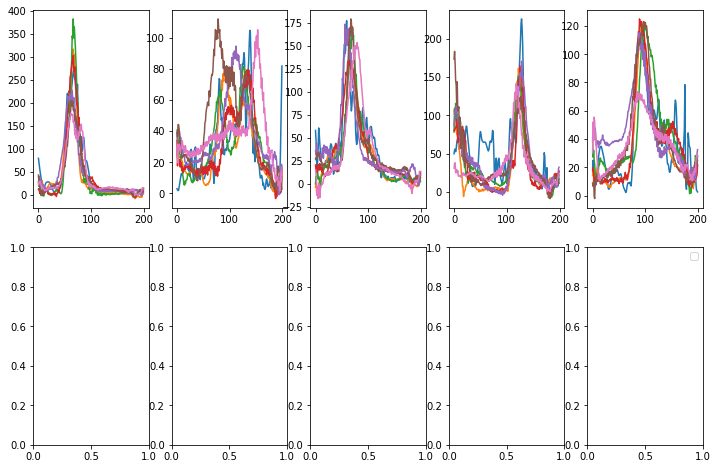

In [28]:
data = x_data[test_gesture_map == 1]

vaes = {}

latent_space_dims = [500, 50, 40, 30, 20, 10]

for ls in latent_space_dims:
    vaes[ls] = VAE(None, None, None, None)
    vaes[ls].load_model("all_users", f"specifically_trained_{ls}")


1/1 [==============================] - 0s 27ms/step


{500: <tf.Tensor: shape=(), dtype=float64, numpy=1073.6442692171838>,
 50: <tf.Tensor: shape=(), dtype=float64, numpy=1555.5094905102233>,
 40: <tf.Tensor: shape=(), dtype=float64, numpy=1529.5773987070086>,
 30: <tf.Tensor: shape=(), dtype=float64, numpy=1422.9789533275841>,
 20: <tf.Tensor: shape=(), dtype=float64, numpy=1804.074330524953>,
 10: <tf.Tensor: shape=(), dtype=float64, numpy=2213.7339204042883>}

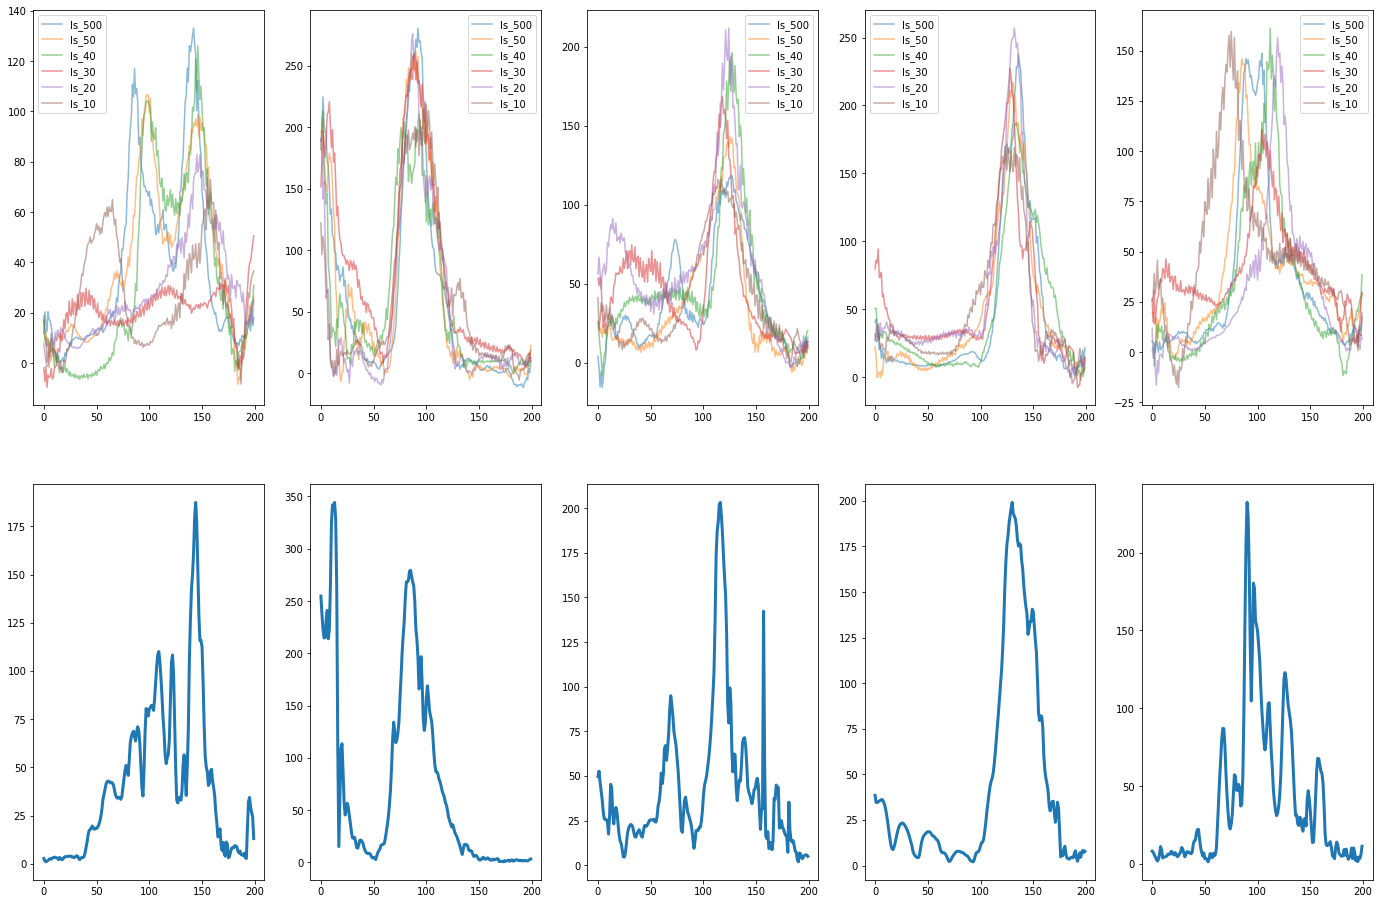

In [38]:
channel = 7
fig,ax = plt.subplots(2, 5, figsize=(24,16))
j = 0

losses = {ls:0 for ls in latent_space_dims}

for i in random.sample(range(0, len(data)), 5):
    
    ax[divmod(j+5,5)].plot(data[i,:,channel], label="original", linewidth=3)
    
    for ls in latent_space_dims:
        
        enc = vaes[ls].encoder.predict(vaes[ls].scaler.transform(data[i:i+1])) #vae.scaler.transform(
        dec = vaes[ls].scaler.inverse_transform(vaes[ls].decoder.predict(enc[0]))
    
        ax[divmod(j,5)].plot(dec[0,:,channel], label=f"ls_{ls}", alpha=0.5)
        losses[ls] += tf.reduce_mean(keras.losses.mse(dec[0,:,:], data[i, :, :]))
        
        
    ax[divmod(j,5)].legend()

    j += 1
    
display(losses)


plt.show()